<a href="https://colab.research.google.com/github/NihilisticMotif/Linear-Regression-Tutorial/blob/main/Algo_LinearRegression_type_Multivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction of multivariate linear regression

Linear regression with multiple variables is also known as "multivariate linear regression".

Variable
* $h(x)=$ Hypothesis function
* $h_i=$ constant in hypothesis function
* $a=$ learning rate
* $n=$ number of features of training example
* $m=$ number of training example
* $x_i=x^{(i)}=$ the input feature of $i$ th example. $| i\le n$ ($i$ th column)
* $x_{i,j}=x^{(i)}_j=$ value of $j$ th feature of the input feature of $i$ th example. $| j\le m$ ($j$ th record)

Hypothesis function:

$h(x)=h_0+h_1*x_1+h_2*x_2+...+h_n*x_n$

$h(x)=[h_0,h_1,...,h_n]\begin{bmatrix}
x_1\\
...\\
x_n
\end{bmatrix}=\vec{h}\cdot \vec{x}$

Gradient Descent:

$h_{i} := h_{i}-a*J'(h_{i})$

$h_{i} := h_{i}-a*\frac{1}{m}*\Sigma_{i=1}^m(h(x_i)-y_i)*x_{i,j} | j:=0...m, 0<i\leq n$

Remark: Note that for convenience reasons in this course we assume $x_{i,0}=x_{0}^{(i)} =1 \text{ for } (i\in { 1,\dots, m } )$. This allows us to do matrix operations with theta and x. Hence making the two vectors $h_i$ and $x_{i,0}$ match each other element-wise (that is, have the same number of elements: $n+1$).

Why?

###Step 1, Getting Data

In [ ]:
!pip install --upgrade -q gspread

     |████████████████████████████████| 40 kB 715 kB/s 


In [ ]:
# import

from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sympy as smp
from sympy import *

from IPython.display import clear_output
from six.moves import urllib

import tensorflow as tf
from IPython.display import display, Latex

# Connect Google Collab with Google Sheet

from google.colab import auth
import gspread
from google.auth import default
from google.colab import data_table

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('student-mat').get_worksheet(0)
rows = worksheet.get_all_values()
dfmain = pd.DataFrame(rows)

# Display Data form Google Sheet

dfmain.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


In [ ]:
# Select only 2 column (G1 and G2)

for i in range(33):
  if i==30 or i==31 or i==32:
    continue
  else:
    del dfmain[i]

dfmain.head()

,30,31,32
0,G1,G2,G3
1,5,6,6
2,5,5,6
3,7,8,10
4,15,14,15


In [ ]:
# Drop first row
dfM=dfmain.drop([0], axis=0)

# Rename column
dfM.rename(columns={30:'G1',31:'G2',32:'G3'},inplace=True)

# Change Data Type form String to Integer
dfM=dfM.astype(int)

# Display Data
dfM.head()

# reference: https://stackoverflow.com/questions/64932538/pandas-attribute-error-nonetype-has-no-attribute-rename

,G1,G2,G3
1,5,6,6
2,5,5,6
3,7,8,10
4,15,14,15
5,6,10,10


Text(0.5, 0, 'G3')

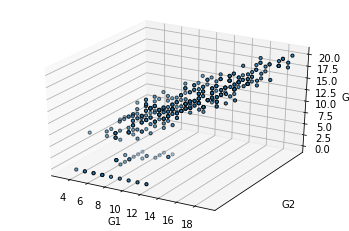

In [ ]:
# import graph library
#import math
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(dfM['G1'],dfM['G2'],dfM['G3'], s=10, edgecolor='black')
plt.yticks([]);

ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G3')

#ax.view_init(0, 90);
# reference: https://youtu.be/gqoLLGgbeAE

###Step 2, Predicting Data using multivariate linear regression.

**Here is hypothesis function.**

$h(x,y)=z_{h}=\{\vec{p}+x*\vec{\beta_1}+y*\vec{\beta_2}|\in x,y\mathbb{R}\}$

**Here is Square Error function.**

$\frac{1}{2m}*\Sigma_{i=0}^m(h(x_{i},y_{i})-z_{i})^2$

**Here is Gradient Descent function.**

$h_{i} := h_{i}-a*J'(h_{i})$

$h_0 := h_0 - a*J'(h_0)$

$h_1 := h_1 - a*J'(h_1)$

$h_2 := h_2 - a*J'(h_2)$

In [ ]:
# x = input x
# y = output y

def gradient_descent(
    gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * np.array(gradient(x, y, vector))
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

def ssr_gradient(x, y, b):
    res = b[2] * x[1] + b[1] * x[0] + b[0] - y
    # res = h_i[2] * dfM['G2'] + h_i[1] * dfM['G1'] + h_i[0] - y
    # res = h_i[2] * Y + h_i[1] * X + h_i[0] - Z
    return [res.mean(), (res * x[0]).mean(), (res * x[1]).mean()]

h_i=gradient_descent(
    ssr_gradient, [dfM['G1'], dfM['G2']], dfM['G3'], start=[0.5, 0.5, 0.5], learn_rate=0.0008,
    n_iter=100_000
)
print(h_i)

[-1.81511847  0.15205054  0.98683359]


Text(0.5, 0, 'G3')

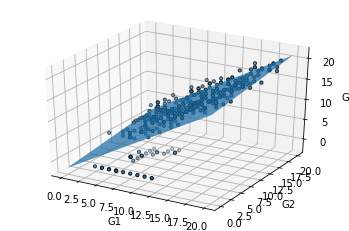

In [ ]:
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

fig = plt.figure()

N = 50
M = 50

x_values = np.linspace(0, 20, N)
y_values = np.linspace(0, 20, M)

X, Y = np.meshgrid(x_values, y_values)

Z = h_i[2]*X+h_i[1]*Y+h_i[0]

ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z);
ax.scatter3D(dfM['G1'],dfM['G2'],dfM['G3'], s=10, edgecolor='black')

ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G3')

#ax.view_init(0,0)
# reference: https://youtu.be/gqoLLGgbeAE

###Reference:
* https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171